## CHAPTER4. 신경망 학습

#### 4.1 데이터에서 학습한다!

- 기계학습  : 사람이 중요한 피쳐를 판단 -> 기계학습 알고리즘에 적용
- 신경망 : 알아서 중요한거 뽑고 알아서 알고리즘
- 범용성을 획득하는 것이 기계학습의 최종 목표
- 편향된 트레인셋을 이용한 학습은 오버피팅 위험

</br>
#### 4.2 손실함수

- 신경망 학습에서는 현재 상태를 '하나의 지표'로 표현
- 그 지표를 가장 좋게 만들어 주는 가중치 매개변수의 값을 탐색하는 것
- 그 지표를 손실함수(loss function) 이라 한다.

#### 평균 제곱 오차 (MSE)

![그림1](http://postfiles10.naver.net/MjAxNzA2MTBfMjk3/MDAxNDk3MDc3MTMwOTQ2.GgGlorZevi3xnKcBFHqCrG6JKGaWMa-IvVv-927bzecg.8JF52k5hIgKhdEbkzcoo_yPW6Hac3WIucgThhTGvFnsg.JPEG.wideeyed/MSE_formula.jpg?type=w3)

In [2]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답이 3번째 칸에 있음 (한원소만 1로 하고 그 외 0 : 원-핫 인코딩)
t  = [0,0,1,0,0,0,0,0,0,0]
# 확률 추정값 3번째가 가장 정답이라고 추정함
y = [0.1, 0.05, 0.6, 0.0 ,0.05, 0.1 , 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y) , np.array(t))
# 실제로 MSE 가 낮게 잘 나온다.

0.097500000000000031

#### 교차 엔트로피 오차

![그림2](http://postfiles14.naver.net/MjAxNzA2MTBfMjI4/MDAxNDk3MDc3MTMwNzM1.3daOicpC7-jE5mdbBRO25T6rHZxlh5YhCB8-Q5YsrE4g.d_g_7KF-4pUsqaQuu1nh9j_4COwCH5_msdNdt3HEPTsg.JPEG.wideeyed/CEE_formula.jpg?type=w3)

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
t  = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0 ,0.05, 0.1 , 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y) , np.array(t))

0.51082545709933802

### 미니배치 학습

- 훈련 데이터 모두에 대한 손실함수의 합을 구하는 것 필요!

In [6]:
from PIL import Image
im = Image.open('deep_learning_images\e 4.3.png')


#### 훈련데이터 모두에 대한 교차엔트로피 식

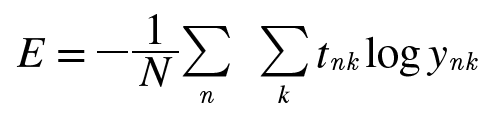

In [7]:
im

- t(n,k) : n번째 데이터의 k번째 값 (정답)
- y(n, k) : 신경망의 출력
- 마지막에 N으로 나눠 정규화
- 예를 들어 60000개 의 데이터중 1000를 무작위 뽑아 그것만으로 학습하는 것이 미니 배치 학습


#### 훈련데이터에서 무작위로 지정한수의 데이터를 골라내자.

In [8]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_ont_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_ont_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_ont_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [9]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize = True , one_hot_label=True)

In [10]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


#### 불러온 데이터에서 무작위로 10장을 빼내자

In [11]:
train_size = x_train.shape[0]
batch_size =  10
batch_mask =  np.random.choice(train_size , batch_size)  # 지정한 범위의 수중 무작위로 원하는 개수만큼 추출하는 함수
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [12]:
np.random.choice(60000, 10)

array([ 3460, 13762, 53887, 37366, 30759, 51423, 40483, 48473, 10072, 51952])

#### 배치용 교차 엔트로피 오차 구현하기

In [13]:
def cross_entopy_error(y, t):
    if y.ndim == 1:   # y는 신경망의 출력인데 1차원이라면 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return - np.sum(t*np.log(y)) / batch_size

#### 손실함수를 설정하는 이유
- 미분 값이 음수면 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수 값을 줄임
- 미분 값이 양수면 가중치 매개병수를 음의 방향으로 변화시켜 손실 함수 값을 올림
- 신경망 학습 지표로 정확도를 삼으면 안되는 이유 매개변수 미분이 대부분에서 0이 되기 때문
- 계단 함수를 활성함수로 사용하지 않은 이유와도 상통함
- 매개변수의 작은 변화가 주는 파장을 캐치하지 못함

### 4.3 수치 미분

In [14]:
# 미분
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x)) / h

- 1e-50 이 0.0 가 되어 (32비트 부동소수점) 반올림 오차 발생 ->  1e-4 으로 사용한다(더 좋다고 알려짐)
- h을 무한히 0으로 보낼수는 없다는 것에서 발생하는 오차 -> x 를 중심으로 전후의 차분을 계산하여 보정 (중심 차분)
- 미분이라 기보다는 엄밀히는 근사 접선임

In [15]:
# 두 포인트를 개선 한것
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

#### 편미분

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2
# 인수들의 제곱합을 계산하는 함수

In [17]:
# x0 = 3 , x1 = 4 일때 x0에 대한 편미분을 구하라
def function_tmp1(x0):
    return x0*x0 + 4.0*2.0
numerical_diff(function_tmp1 , 3.0)

6.00000000000378

### 4.4 기울기(gradient)

- 모든 변수의 편미분을 벡터로 정리한것

In [18]:
def numerical_gradient(f, x):   # f는 함수 x 는 넘파이 배열 즉 넘파이 배열 각원소에 대해서 수치 미분을 구한다. 
    h = 1e-4 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x-h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] =  (fxh1 - fxh2) /  (2*h)
        x[idx] = tmp_val # 값 복원 
    return grad
        

In [19]:
# test
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

#### 기울기 의미 파악하기

C:\Users\good\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


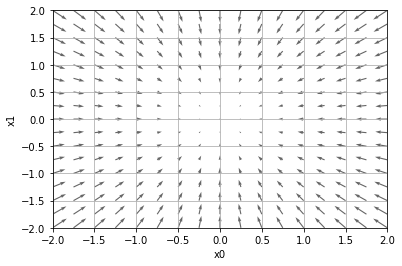

In [20]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

- 그림에서 기울기는 방향을 가진 벡터(화살표)로 표현
- 가장 낮은 장소를 가리키는 것(정확히는 각 지점에서 낮아지는 방향)
- 기울기가 가리키는 방향은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향!

####  

#### 경사 하강법

- 기울기를 이용해 함수의 최솟값을 찾으려는 것
- 꼭 기울어진 방향이 최솟값이라는 보장은 X 그냥 안장점일 수가 있다

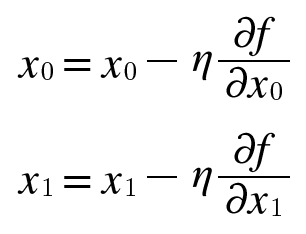

In [21]:
im2 = Image.open('deep_learning_images\e 4.7.png')
im2

- 경사법을 수식으로 나타낸 것
- 에타는 갱신하는 양(학습률) learning_rate
- 위식은 1회에 해당하는 갱신이고 이 단계를 반복하는 것

#### 구현

In [22]:
def gradient_descent( f , init_x , lr = 0.01, step_num = 100):
    x = init_x   # 초기값, 학습률, 경사법에 따른 반복 횟수 
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 함수의 기울기를 만들어놓은  numerical_gradient 함수로 구하고 
        x -= lr*grad                    # 거기다 학습률을 곱해 step_num 번 갱신해라 
    return x

In [23]:
# test
# 1. 학습률을 너무 크게했을때 너무 큰값으로 발산해버린다.
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr = 10.0 , step_num = 100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [24]:
# test
# 2. 학습률을 너무 작게했을때 변화가 거의 없다.
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr = 1e-10 , step_num = 100)

array([-2.99999994,  3.99999992])

####   

#### 신경망에서의  기울기 

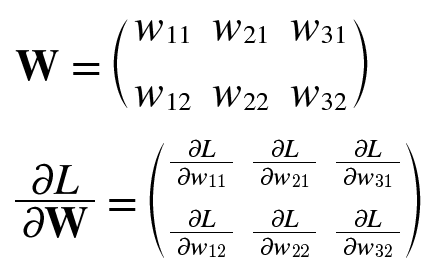

In [25]:
im2 = Image.open('deep_learning_images\e 4.8.png')
im2

- 기울기란 가중치 매개변수에 대한 손실 함수의 기울기
- 위 식에서 1행 1번째 원소는 w11를 조금 변화시켰을때 L이 얼마나 변하냐

### 구현

In [30]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.54829954  0.01134594 -0.55964548]
 [ 0.82244931  0.01701891 -0.83946822]]


####   

### 4.5 학습 알고리즘 구현하기

#### 복습
- 전제 : 신경망에는 가중치와 편향이 존재 이것을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 함
- 1단계 - 미니 배치 : 훈련 데이터 중 일부 무작위 가져온다.
- 2단계 - 기울기 산출 : 미니배치의 손실함수값을 줄이기 위해 각 가중치 매개변수 기울기 구한다. 기울기는 손실함수 값을 가장 작게하는 방향 제시
- 3단계 - 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 조금씩 갱신
- 4단계 - 반복 : 1~3단계 반복

####    

#### 2층 신경망 클래스 구현하기

In [38]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}      # 신경망 매개변수 보관하는 딕셔너리 W1 은 첫번째 층 가중치 W2 는 2번째 층의 가중치 b1, b2는 편향 
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측 수행 메서드
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실함수 구하는 메소드 
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도 계산
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 가중치 매개변수 기울기 구하기 
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}      # 기울기 보관하는 딕셔너리 변수 
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads


- TwoLayerNet 클래스는 딕셔너리인 params와 grads 를 인스턴스로 갖는다.
- params 변수에는 가중치 매개변수가 저장 
- 예를들어 1번째 층의 가중치 매개변수는 params['W1'] 키에 넘파이 배열로 저장 

In [39]:
# test
net = TwoLayerNet(input_size = 784 , hidden_size = 100, output_size = 10 )
net.params['W1'].shape,net.params['b1'].shape , net.params['W2'].shape ,net.params['b2'].shape  # 신경망에 필요한 매개변수 저장

((784, 100), (100,), (100, 10), (10,))

In [41]:
# 예측 처리 
x = np.random.rand(100, 784)
y = net.predict(x)

array([[ 0.09247553,  0.10562164,  0.10079935,  0.10239648,  0.09286803,
         0.09903758,  0.10351773,  0.09637141,  0.10482581,  0.10208644],
       [ 0.09255937,  0.10578246,  0.10055651,  0.10244628,  0.09294363,
         0.09937571,  0.10330597,  0.09626492,  0.10465422,  0.10211094],
       [ 0.09253171,  0.10604455,  0.10087274,  0.1022543 ,  0.09289294,
         0.0986424 ,  0.10352861,  0.09630662,  0.10479546,  0.10213067],
       [ 0.09277923,  0.10569384,  0.10086944,  0.10242774,  0.09301863,
         0.09890268,  0.10344588,  0.09650919,  0.10450572,  0.10184764],
       [ 0.09229251,  0.1055914 ,  0.10078025,  0.10210386,  0.09290441,
         0.09903283,  0.10347163,  0.09651618,  0.10504722,  0.10225972],
       [ 0.09262086,  0.10575294,  0.1008097 ,  0.10217171,  0.09274035,
         0.09927318,  0.10346926,  0.09617154,  0.1049819 ,  0.10200857],
       [ 0.09257593,  0.10574916,  0.10075091,  0.10253107,  0.0929131 ,
         0.09921362,  0.10320001,  0.09650566

In [ ]:
x = np.random.rand(100, 784)   # 더미 입력 데이터(100장)
t = np.random.rand(100, 0)     # 더미 정답 레이블(100장)

grads = net.numerical_gradient(x, t) # 기울기 계산 

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10, )

In [ ]:
# 오차역전파법 
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

####     

#### 미니배치 학습 구현하기

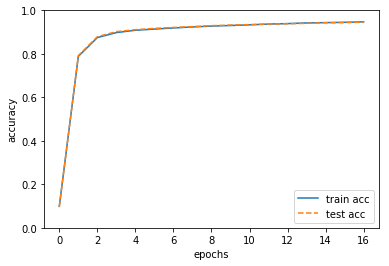

In [52]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []


for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


#### 코드 설명
- 매번 60000개의 훈련 데이터에서 임의로 100개의 데이터(이미지데이터, 정답 레이블)를 추려냄
- 뽑은 100개의 미니배치를 대상으로 확률적 경사 하강법 수행하여 매개변수 갱신
- 경사법에 의한 갱신 횟수를 10000으로 설정하며 갱신할때마다 손실함수 게산 
- 손실함수 값이 변화하는 추이를 그래프로 나타낸 것

####      

#### 학습도중 정기적으로 훈련데이터와 시험데이터의 정확도를 기록하자

- 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당함
- 예를들어 훈련 데이터 10000개를 100개의 미니배치로 학습할 경우 확률 경사 하강법을 100반복하면 1에폭이 된 것

#### 정리
- 기계학습에서 사용하는 데이터셋은 트레인 / 테스트 나눠서 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용, 기울어진 방향으로 가중치 갱신작업 반복
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수 기울기를 구한다
- 수치 미분 이용한 계산은 시간이 걸리지만 오차역전파법을 이용하면 빠르게 구할 수 있다.